In [207]:
import matplotlib.pyplot as plt
import numpy as np
import math as mt
import julia
import os
import random as rd

from julia.api import Julia
jl = Julia(compiled_modules=False)

#from julia import Base
from julia import Main
#from julia import DifferentialEquations
from julia import DynamicalSystems

from matplotlib import rc
%load_ext julia.magic

The julia.magic extension is already loaded. To reload it, use:
  %reload_ext julia.magic


### Energy

In [208]:
E = 0.1
Ename = "01"

----------------------------------------
----------------------------------------
----------------------------------------

In [231]:
Main.E = E
%julia px(E, y, py) = sqrt(2*E - py*py - y*y + 2*y*y*y/3)
%julia ics_select = []
%julia for ic in 1:100;  y = 0.4*rand(Float64); py = 0.1*rand([-1, 1])*rand(Float64); ic = [0.0, y, px(E, y, py), py] ; push!(ics_select, ic); end;

#%julia i = 1
#%julia ics = DynamicalSystems.Systems.henonheiles_ics(E, 1000)[1:end]
#%julia for ic in ics; if ic[2] > 0.1 && ic[2] < 0.4 && ic[4] > -0.1 && ic[4] < 0.1; push!(ics_select, ic); end; end;

%julia length(ics_select)

100

In [236]:
x_train = []
y_train = []

for i in range(1,100):
    
    print(i)
    Main.i = i
    %julia T = 200. ; dt = 0.001
    %julia ds = DynamicalSystems.Systems.henonheiles(ics_select[i])
    %julia x = DynamicalSystems.Systems.trajectory(ds, T, dt = dt)[:,1];
    %julia y = DynamicalSystems.Systems.trajectory(ds, T, dt = dt)[:,2];
    %julia xdot = DynamicalSystems.Systems.trajectory(ds, T, dt = dt)[:,3];
    %julia ydot = DynamicalSystems.Systems.trajectory(ds, T, dt = dt)[:,4];


    x = Main.x.tolist()
    y = Main.y.tolist()
    xdot = Main.xdot.tolist()
    ydot = Main.ydot.tolist()

    Ty=[y[0]]
    Tydot=[ydot[0]]

    #Ty.append(y[0])
    #Tydot.append(ydot[0])

    s = np.sign(x[1])

    for i in range(1,len(x)):

        if np.sign(x[i]) != s:
            if xdot[i]>0:
                Ty.append(y[i])
                Tydot.append(ydot[i])
            s = np.sign(x[i])
    
    #print(len(Ty))

    x_train = x_train + [np.array([Ty[i],Tydot[i]]) for i in range(len(Ty)-1)]
    y_train = y_train + [np.array([Ty[i],Tydot[i]]) for i in range(1,len(Ty))]

len(x_train)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


3123

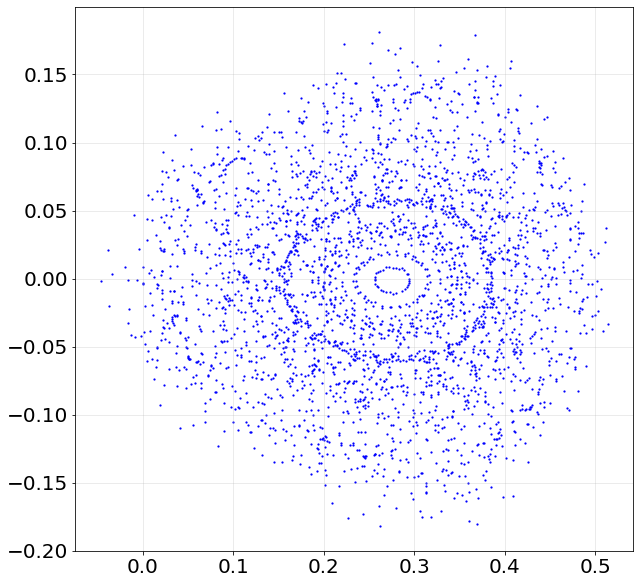

In [237]:
plt.figure(figsize=(10,10))
plt.scatter(*zip(*x_train), color = "b", linewidth = 0, s=5)
plt.grid(axis='both', alpha=.3)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

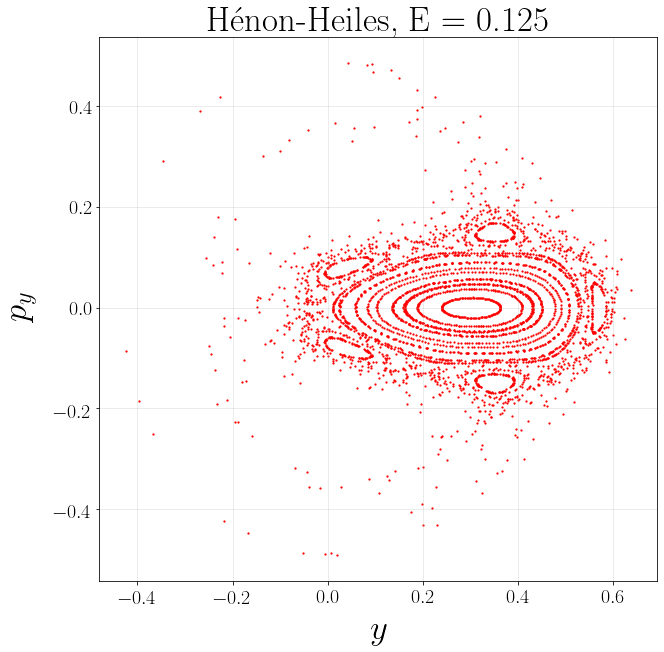

In [37]:
plt.figure(figsize=(10,10))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.title(r'H\'enon-Heiles, E = ' + str(E), fontsize = 35)
plt.scatter(*zip(*x_train), color = "r", label = r'$\mathcal{T}^{2}(x)$, learned', linewidth = 0, s=5)
plt.xlabel(r'$y$', fontsize=35, labelpad=8)
plt.ylabel(r'$p_{y}$', fontsize=35, labelpad=15)
plt.grid(axis='both', alpha=.3)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.xlim(-0.2, 0.6)
#plt.ylim(-0.33, 0.33)
#plt.legend(fontsize = 15, loc = 'upper right')
plt.savefig("Poincare_HH_0125")
plt.show()

In [238]:
c = list(zip(x_train, y_train))

rd.shuffle(c)

x_train, y_train = zip(*c)

In [239]:
os.remove("x_train_"+ Ename +".txt")
f = open("x_train_" + Ename + ".txt", "a")
for i in x_train:
    f.write(str(i[0]))
    f.write("\n")
    f.write(str(i[1]))
    f.write("\n")
f.close()

In [240]:
os.remove("y_train_"+ Ename +".txt")
f = open("y_train_"+ Ename +".txt", "a")
for i in y_train:
    f.write(str(i[0]))
    f.write("\n")
    f.write(str(i[1]))
    f.write("\n")
f.close()

## For future state prediction

In [152]:
def px(E, y, py):
    
    return np.sqrt(2*E - py*py - y*y + 2*y*y*y/3)

In [187]:
x0 = [[0.0, 0.1, px(E, 0.1, 0.0), 0.0], [0.0, 0.35, px(E, 0.35, 0.0), 0.0], [0.0, 0.17, px(E, 0.17, 0.0), 0.0], [0.0, 0.3, px(E, 0.3, 0.0), 0.0], [0.0, 0.4, px(E, 0.4, 0.0), 0.0], [0.0, 0.33, px(E, 0.33, 0.05), 0.05], [0.0, 0.33, px(E, 0.33, 0.1), 0.1]]
Main.x0 = x0[0]
Main.x1 = x0[1]
Main.x2 = x0[2]
Main.x3 = x0[3]
Main.x4 = x0[4]
Main.x5 = x0[5]
Main.x6 = x0[6]

%julia ics_select = [x0, x1, x2, x3, x4, x5, x6]
trajectory = []

for i in range(1,len(x0)+1): 
    Main.i = i
    %julia T = 700. ; dt = 0.0001
    %julia ds = DynamicalSystems.Systems.henonheiles(ics_select[i])
    %julia x = DynamicalSystems.Systems.trajectory(ds, T, dt = dt)[:,1];
    %julia y = DynamicalSystems.Systems.trajectory(ds, T, dt = dt)[:,2];
    %julia xdot = DynamicalSystems.Systems.trajectory(ds, T, dt = dt)[:,3];
    %julia ydot = DynamicalSystems.Systems.trajectory(ds, T, dt = dt)[:,4];


    x = Main.x.tolist()
    y = Main.y.tolist()
    xdot = Main.xdot.tolist()
    ydot = Main.ydot.tolist()

    Ty=[y[0]]
    Tydot=[ydot[0]]


    s = np.sign(x[1])

    for i in range(1,len(x)):

        if np.sign(x[i]) != s:
            if xdot[i]>0:
                Ty.append(y[i])
                Tydot.append(ydot[i])
            s = np.sign(x[i])
        
    trajectory.append([np.array([Ty[i],Tydot[i]]) for i in range(len(Ty)-1)])


len(x_train)

2659

### Starting points

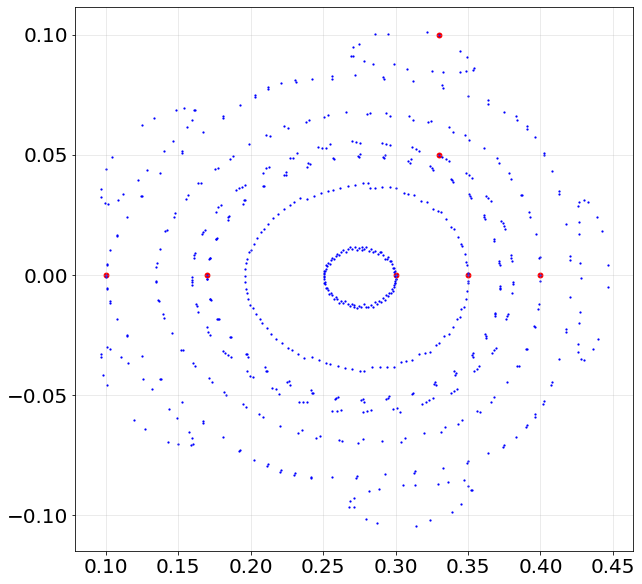

In [205]:
plt.figure(figsize=(10,10))

plt.scatter([i[1] for i in x0], [i[3] for i in x0], color = "r", linewidth = 0, s=35)
for t in trajectory:
    plt.scatter(*zip(*t[:100]), color = "b", linewidth = 0, s=5)    
plt.grid(axis='both', alpha=.3)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)    
plt.show()

In [206]:
Trajectory_length = 100 #must be same as in the Notebook file
os.remove("trajectory"+ Ename +".txt")
f = open("trajectory" + Ename + ".txt", "a")
for i in trajectory:
    for j in i[:Trajectory_length]:
        f.write(str(j[0]))
        f.write("\n")
        f.write(str(j[1]))
        f.write("\n")
f.close()

7

In [191]:
[[i[1], i[3]] for i in x0]

[[0.1, 0.0],
 [0.35, 0.0],
 [0.17, 0.0],
 [0.3, 0.0],
 [0.4, 0.0],
 [0.33, 0.05],
 [0.33, 0.1]]